**Part III. Advanced Marketing Applications**

**8.Reducing Data Complexity**

**8.1 Consumer Brand Rating Data**

In [1]:
brand.ratings = read.csv("http://goo.gl/IQl8nc")
head(brand.ratings)

perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
2,4,8,8,2,9,7,4,6,a
1,1,4,7,1,1,1,2,2,a
2,3,5,9,2,9,5,1,6,a
1,6,10,8,3,4,5,2,1,a
1,1,5,8,1,9,9,1,1,a
2,8,9,5,3,8,7,1,2,a


In [2]:
tail(brand.ratings)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,4,2,8,7,1,3,3,5,2,j
996,2,2,3,6,4,8,5,1,2,j
997,3,2,6,7,1,3,3,2,1,j
998,1,1,10,10,1,6,5,5,2,j
999,1,1,7,5,1,1,2,5,1,j
1000,7,4,7,8,4,1,2,5,1,j


In [3]:
summary(brand.ratings)

    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max. 

In [4]:
str(brand.ratings)

'data.frame':	1000 obs. of  10 variables:
 $ perform: int  2 1 2 1 1 2 1 2 2 3 ...
 $ leader : int  4 1 3 6 1 8 1 1 1 1 ...
 $ latest : int  8 4 5 10 5 9 5 7 8 9 ...
 $ fun    : int  8 7 9 8 8 5 7 5 10 8 ...
 $ serious: int  2 1 2 3 1 3 1 2 1 1 ...
 $ bargain: int  9 1 9 4 9 8 5 8 7 3 ...
 $ value  : int  7 1 5 5 9 7 1 7 7 3 ...
 $ trendy : int  4 2 1 2 1 1 1 7 5 4 ...
 $ rebuy  : int  6 2 6 1 1 2 1 1 1 1 ...
 $ brand  : Factor w/ 10 levels "a","b","c","d",..: 1 1 1 1 1 1 1 1 1 1 ...


**8.1.1 Rescaling the Data**

A common procedure is to center each variable by subtracting its mean from every observation, and then rescale those centered values as units of standard deviation. This is commonly called ***standardizing, normalizing,or Z scoring*** the data

In [6]:
x = 1:1000
x.sc = (x-mean(x)) / sd(x)
summary(x.sc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7295 -0.8647  0.0000  0.0000  0.8647  1.7295 

In [7]:
brand.sc = brand.ratings
brand.sc[,1:9] = scale(brand.sc[,1:9])
summary(brand.sc)

    perform            leader            latest             fun          
 Min.   :-1.0888   Min.   :-1.3100   Min.   :-1.6878   Min.   :-1.84677  
 1st Qu.:-1.0888   1st Qu.:-0.9266   1st Qu.:-0.7131   1st Qu.:-0.75358  
 Median :-0.1523   Median :-0.1599   Median : 0.2615   Median :-0.02478  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7842   3rd Qu.: 0.6069   3rd Qu.: 0.9113   3rd Qu.: 0.70402  
 Max.   : 1.7206   Max.   : 2.1404   Max.   : 1.2362   Max.   : 1.43281  
                                                                         
    serious           bargain             value             trendy        
 Min.   :-1.1961   Min.   :-1.22196   Min.   :-1.3912   Min.   :-1.53897  
 1st Qu.:-0.8362   1st Qu.:-0.84701   1st Qu.:-0.9743   1st Qu.:-0.80960  
 Median :-0.1163   Median :-0.09711   Median :-0.1405   Median :-0.08023  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6036   3rd Qu.: 0.652

In corrplot(), the argument order="hclust" reorders the rows and columns according to variables’ similarity in a hierarchical cluster solution. The result is shown in Fig, where we see that the ratings seem to group into three clusters of similar variables, a hypothesis we examine in detail in this chapter.

In [9]:
install.packages('corrplot')
library(corrplot)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


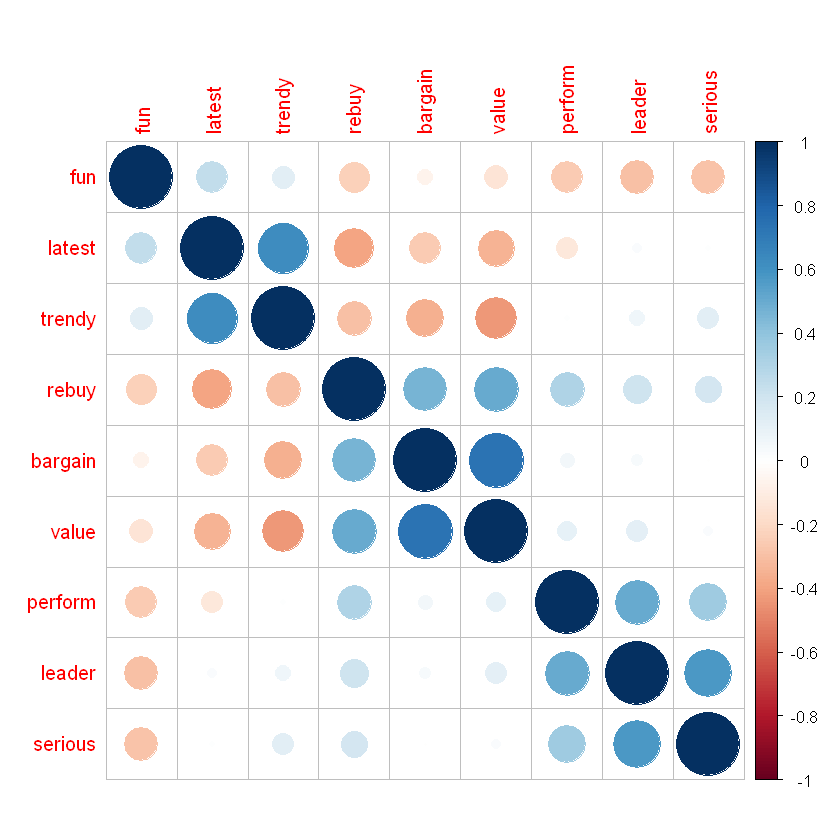

In [10]:
corrplot(cor(brand.sc[,1:9]), order='hclust')